In [1]:
# ライブラリ読み込み（下記のライブラリは全てGoogle Colabにインストール済です）
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

In [2]:
!wget http://nakatolab.iqb.u-tokyo.ac.jp/supplement/PBMC_10cell_types_total_500.csv.gz

--2023-10-28 03:24:23--  http://nakatolab.iqb.u-tokyo.ac.jp/supplement/PBMC_10cell_types_total_500.csv.gz
Resolving nakatolab.iqb.u-tokyo.ac.jp (nakatolab.iqb.u-tokyo.ac.jp)... 163.43.80.77
Connecting to nakatolab.iqb.u-tokyo.ac.jp (nakatolab.iqb.u-tokyo.ac.jp)|163.43.80.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5434256 (5.2M) [application/x-gzip]
Saving to: ‘PBMC_10cell_types_total_500.csv.gz’

PBMC_10cell_types_t 100%[===================>]   5.18M  1.10MB/s    in 4.7s    

2023-10-28 03:24:28 (1.10 MB/s) - ‘PBMC_10cell_types_total_500.csv.gz’ saved [5434256/5434256]



In [3]:
input_data = pd.read_csv("PBMC_10cell_types_total_500.csv.gz", index_col=0)
input_data.shape

(32738, 5000)

In [4]:
input_data.head()

,ACAGTCGAGTTACG-1,CACAATCTAAGGGC-1,TATACCACGCTATG-1,GTGTAGTGTCTATC-1,TGCTATACGTATCG-1,GCAGGCACTGCACA-1,AGCGGCTGACAGTC-1,CGAAGTACACTAGC-1,TAACATGACCTCGT-1,AACCGCCTCGAGAG-1,...,GAGTAAGACTAGTG-1,ACCTGGCTATTCGG-1,GTGAGGGAAAAGTG-1,CTCTAATGTGGGAG-1,GAGCAGGATCAGGT-1,AATCTCTGAAGAAC-1,ACGACCCTGCAGAG-1,TATGGTCTCAAAGA-1,TCTTGATGATCACG-1,ACTGAGACTTCACT-1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
ncells = 500
cellname = ["regulatory_t", "cd56_nk", "naive_cytotoxic", "cytotoxic_t", "b_cell",
            "memory_t", "naive_t", "cd4_helper_t", "cd14_monocytes", "cd34"]
labels= []
for cell in cellname:
    labels += [cell] * ncells

input_data.columns = labels
input_data.head()

,regulatory_t,regulatory_t,regulatory_t,regulatory_t,regulatory_t,regulatory_t,regulatory_t,regulatory_t,regulatory_t,regulatory_t,...,cd34,cd34,cd34,cd34,cd34,cd34,cd34,cd34,cd34,cd34
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
## 全細胞で発現量0の遺伝子を除外
df = input_data
print("number of all genes: ", df.shape[0])

zero = np.all(df == 0, axis=1)
nonzero = np.logical_not(zero)
df = df[nonzero]
print("number of nonzero genes: ", df.shape[0])

number of all genes:  32738
number of nonzero genes:  16960


In [7]:
# 発現量のTotal read正規化・対数化
colsum = df.sum()
df = df / colsum * 10000
df = np.log1p(df)
df.head()

,regulatory_t,regulatory_t,regulatory_t,regulatory_t,regulatory_t,regulatory_t,regulatory_t,regulatory_t,regulatory_t,regulatory_t,...,cd34,cd34,cd34,cd34,cd34,cd34,cd34,cd34,cd34,cd34
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
%%time
A = df.T
pca = PCA()
pca.fit(A)
PC = pca.transform(A)

CPU times: user 4min 1s, sys: 6 s, total: 4min 7s
Wall time: 2min 16s


In [10]:
df = pd.DataFrame({ 'PC1' : PC[:,0], 'PC2' : PC[:,1], 'cell' : labels})
df.head()

,PC1,PC2,cell
0,-1.491188,2.378841,regulatory_t
1,-1.394000,-5.895192,regulatory_t
2,-2.681231,-1.834112,regulatory_t
3,1.455147,0.239732,regulatory_t
4,-0.864700,-1.447870,regulatory_t


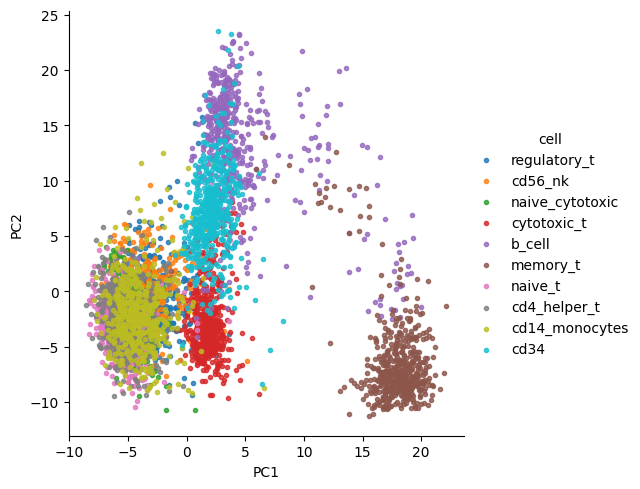

In [11]:
sns.lmplot(x="PC1", y="PC2", data=df, hue="cell", fit_reg=False, legend=True, markers=".")
plt.show()

In [12]:
%%time

# tSNEの計算
model = TSNE(n_components=2, perplexity=20, n_iter=5000, verbose=1, random_state=0)
tsne = model.fit_transform(PC[:,0:9])

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.005s...
[t-SNE] Computed neighbors for 5000 samples in 0.167s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1.502541
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.543884
[t-SNE] KL divergence after 5000 iterations: 1.368809
CPU times: user 3min 17s, sys: 262 ms, total: 3min 18s
Wall time: 1min 49s


In [13]:
df = pd.DataFrame({ 'tSNE_1' : tsne[:,0], 'tSNE_2' : tsne[:,1], 'cell' : labels})
df.head()

,tSNE_1,tSNE_2,cell
0,-38.185902,32.559219,regulatory_t
1,-24.767963,1.009367,regulatory_t
2,-16.630163,22.369890,regulatory_t
3,-43.798698,31.485851,regulatory_t
4,-42.263454,28.091022,regulatory_t


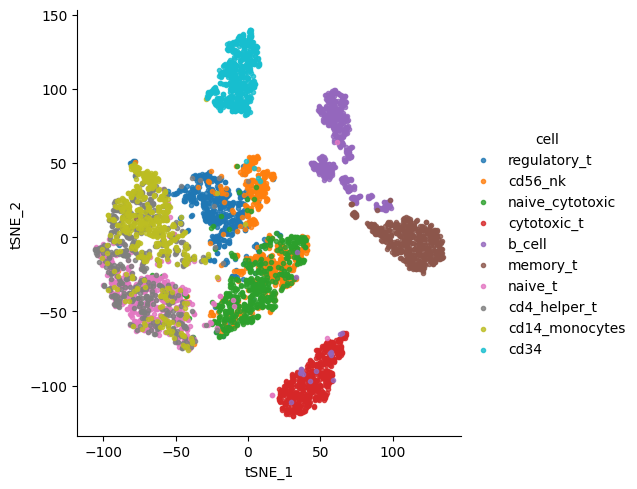

In [ ]:
sns.lmplot(x="tSNE_1", y="tSNE_2", data=df, hue="cell", fit_reg=False, legend=True, markers=".")
plt.show()

In [ ]:
# UMAPの計算
# UMAPが入っていない場合は以下のコマンドでインストール
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=245c16162e9b74835df22cbba13eae6137b7b11790e33a997417b4df5c0485ee
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=9b7157344124d915e4c90f4a4fed2e0af898b20118ffa091488d396cf207e1da
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
import umap
um = umap.UMAP().fit_transform(PC[:,0:9])
df = pd.DataFrame({ 'UMAP_1' : um[:,0], 'UMAP_2' : um[:,1], 'cell' : labels})
df.head()

,UMAP_1,UMAP_2,cell
0,-0.244350,2.944833,regulatory_t
1,-1.776245,4.307381,regulatory_t
2,-0.976185,4.125471,regulatory_t
3,-0.167732,2.738826,regulatory_t
4,-0.338652,2.771835,regulatory_t


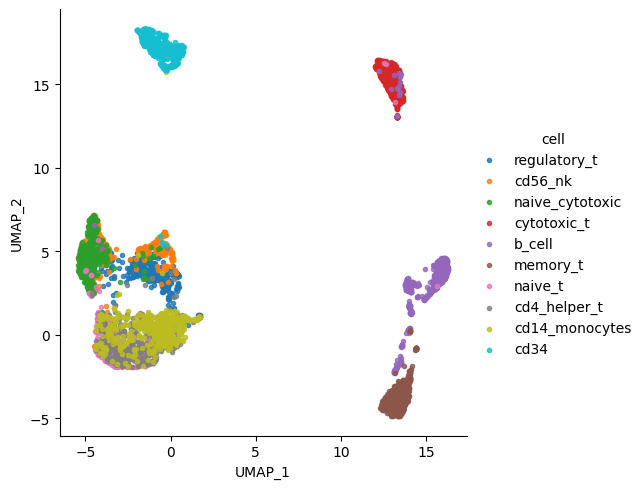

In [ ]:
sns.lmplot(x="UMAP_1", y="UMAP_2", data=df, hue="cell", fit_reg=False, legend=True, markers=".")
plt.show()

In [ ]:
!pip install pydiffmap

In [ ]:
PC[:,0:9]

array([[-1.49118804,  2.37884108,  1.90767704, ...,  0.6363937 ,
         6.46931519,  1.07172032],
       [-1.39400044, -5.89519232,  2.39208372, ..., -4.40410756,
         1.27325349,  1.16505802],
       [-2.68123135, -1.83411233,  0.72294197, ..., -3.27856606,
         0.02194288, -2.0526383 ],
       ...,
       [ 2.01957127,  5.13160108, 13.90371898, ..., -0.633726  ,
        -0.58133656,  1.42076672],
       [ 3.27170165,  8.19854532, 12.88038864, ...,  3.20553602,
         1.43272954, -2.31608914],
       [ 2.83909177,  6.77444513, 12.82062265, ..., -2.59303493,
        -3.05035545,  0.56328488]])

In [ ]:
from pydiffmap import diffusion_map as dm

# Create a Diffusion Map object
neighbor_params = {'n_jobs': -1, 'n_neighbors': 10}
mydmap = dm.DiffusionMap.from_sklearn(n_evecs=2, k=64, epsilon='bgh', alpha=1.0) # , neighbor_params=neighbor_params

# Fit and transform the data
embedding = mydmap.fit_transform(PC[:,0:9])

ArpackNoConvergence: ignored

In [ ]:
# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(embedding[:, 0], embedding[:, 1], s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Diffusion Map projection of the PCA dataset', fontsize=24)
plt.show()